In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [4]:
# Load dataset
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
# Zero padding
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [6]:
# One hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
# Initialize model
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))    # document size = 500 x 128 x 1
model.add(layers.Conv1D(32, 7, activation='relu'))                      # filter size = 7 x 128 x 1
model.add(layers.MaxPool1D(5))                                          # filter size = 5 x 1, stride = 5
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [8]:
# Fit the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 100s 632ms/step - loss: 0.6682 - accuracy: 0.5709 - val_loss: 0.7178 - val_accuracy: 0.5728
Epoch 2/10
157/157 [==============================] - 66s 421ms/step - loss: 0.3875 - accuracy: 0.8276 - val_loss: 0.3198 - val_accuracy: 0.8654
Epoch 3/10
157/157 [==============================] - 67s 427ms/step - loss: 0.2634 - accuracy: 0.8926 - val_loss: 0.3034 - val_accuracy: 0.8742
Epoch 4/10
157/157 [==============================] - 63s 400ms/step - loss: 0.2089 - accuracy: 0.9204 - val_loss: 0.2833 - val_accuracy: 0.8826
Epoch 5/10
157/157 [==============================] - 67s 428ms/step - loss: 0.1666 - accuracy: 0.9374 - val_loss: 0.2920 - val_accuracy: 0.8850
Epoch 6/10
157/157 [==============================] - 64s 405ms/step - loss: 0.1298 - accuracy: 0.9540 - val_loss: 0.3423 - val_accuracy: 0.8748
Epoch 7/10
157/157 [==============================] - 62s 392ms/step - loss: 0.0921 - accuracy: 0.9694 - val_loss: 0.3537 - val_a

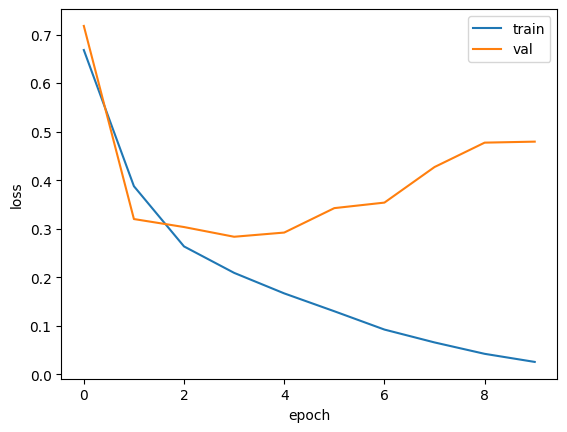

In [9]:
# Visualize the loss in fitting progress
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy:', test_acc)

782/782 [==============================] - 18s 23ms/step - loss: 0.5160 - accuracy: 0.8703
Test Accuracy: 0.8702800273895264
